# **NADILA IMAARAH - 3323600015 - 2 SDT A**

# **1. dataset = transaction.csv, dan tampilkan**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv('transaction.csv')
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [17]:
print(dataset.isna().sum())

InvoiceNo      0
StockCode      0
Qty            0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64


# **2. country = berapa kemunculan tiap negara pada dataset, dan tampilkan**

**ANALISIS**

disini saya menhitung jumlah kemunculan nama tiap negara. Disini saya akan menggunakan kolom country saja lalu menggunakan fungsi value_counts() yang akan secara otomatis menghitung banyak kemunculan masing-masing nama negara di kolom country

In [18]:
country_counts = dataset["Country"].value_counts()
country_counts

Country
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republic             4
Bahrai

**ANALISIS**

disini saya menhitung jumlah kemunculan nama tiap negara. Disini saya akan menggunakan kolom country saja lalu menggunakan fungsi value_counts() yang akan secara otomatis menghitung banyak kemunculan masing-masing nama negara di kolom country

# **3. transaksi = hitunglah banyaknya transaksi pada tiap negara (1 kode InvoiceNo =1 transaksi)**

**ANALISIS**

Disini saya akan mengelompokkan data berdasarkan negara di kolom country dengan menggunakan fungsi groupby, setelah dikelompokkkan per negara akan dilakukan menghitung jumlah Invoice No setiap negara dengan menggunakan fungsi nunique(). InvoiceNo ini yang dihitung yang nilainya unik dan tidak duplikat jadi  kalau di data ada 3 baris dengan InvoiceNo yang sama, itu hanya dihitung 1 transaksi, bukan 3

In [19]:
trans_by_country = dataset.groupby('Country')['InvoiceNo'].nunique().reset_index()
trans_by_country.columns = ['Country', 'TransactionCount']
print("\nJumlah transaksi per negara:")
print(trans_by_country)



Jumlah transaksi per negara:
                 Country  TransactionCount
0              Australia                44
1                Austria                12
2                Bahrain                 1
3                Belgium                84
4                 Brazil                 1
5                 Canada                 3
6        Channel Islands                21
7                 Cyprus                16
8         Czech Republic                 2
9                Denmark                18
10                  EIRE               224
11    European Community                 3
12               Finland                26
13                France               344
14               Germany               377
15                Greece                 5
16               Iceland                 6
17                Israel                 4
18                 Italy                31
19                 Japan                14
20               Lebanon                 1
21             Lithuania

**ANALISIS**

Disini saya akan mengelompokkan data berdasarkan negara di kolom country dengan menggunakan fungsi groupby, setelah dikelompokkkan per negara akan dilakukan menghitung jumlah Invoice No setiap negara dengan menggunakan fungsi nunique(). InvoiceNo ini yang dihitung yang nilainya unik dan tidak duplikat jadi  kalau di data ada 3 baris dengan InvoiceNo yang sama, itu hanya dihitung 1 transaksi, bukan 3

# **4. cluster = lakukan clustering pada transaksi dengan Average Linkage, dengan k=3**

In [20]:
Z = linkage(trans_by_country[['TransactionCount']], method='average')
clusters = fcluster(Z, 3, criterion='maxclust')
trans_by_country['Cluster'] = clusters

**ANALISIS**

pertama menghitung jarak antar negara berdasarkan banyak transaksinya

 kemudian untuk mengabungkan kelompok  yakni dengan cara menghitung jaraknya akan di ukur dari rata-rata jarak antar anggota kelompok dengan method=average. 
 
 Setelah itu melakukan cluster sebanyak 3 cluster dan kemudian menambah kolom baru bernama cluster yang berisi label cluster setiap negara

di sini saya akan melakukan pengelompokkan berdasrakan jumlah transaksi, dengan cara memandingkan  seberapa mirip atau bedanya jumlah transaksi antar negara, lalu membentuk hubungan antar negara berdasarkan kemiripan tersebut.Dari hasil pengelompokkkan ini dilakukan cluser dalam 3 cluster saja. Setelah itu membuat kolom baru Bernama cluster sehingga setiap negara sekarang punya label kelompok (misalnya Cluster 1, 2, atau 3), sesuai hasil pengelompokan.

# **5. centroid = tentukan posisi centroid dari setiap cluster**

In [21]:
centroids = trans_by_country.groupby('Cluster')['TransactionCount'].mean().reset_index()
centroids.columns = ['Cluster', 'Centroid']
centroids




,Cluster,Centroid
0,1,18.787879
1,2,360.500000
2,3,224.000000


**ANALISIS**

Setelah melakukan cluster disini mengelompokkan negara berdasarkan cluster 1,2 dan 3 dengan menggunakan groupby. Kemudian dihitung centroid dari setiap cluster,centroid ini dihitung dari rata-rata fitur TransactionCount

# **6. sorted = lakukan pengurutan posisi centroid secara ascending**

In [22]:
sorted_centroids = centroids.sort_values('Centroid').reset_index(drop=True)
print(sorted_centroids)

   Cluster    Centroid
0        1   18.787879
1        3  224.000000
2        2  360.500000


**ANALISIS**

Hasil centroid sebelumnya akan diurutkan pada tahap ini. Pengurutan didasarkan pada value dari transaksi dengan metode pengurutan ascending (dari kecil ke besar).

# **7. Indeks terdepan dari centroid setelah pengurutan, mengindikasikan cluster transanksi rendah. Indeks terakhir dari centroid setelah pengurutan, mengindikasikan cluster transanksi tinggi. Indeks di antaranya, mengindikasikan cluster transanksi sedang. Tampilkan negara mana saja yang transaksinya rendah, sedang dan tinggi.**

In [23]:
level_labels = ['Rendah', 'Sedang', 'Tinggi']
cluster_level_map = {
    cluster_id: level
    for cluster_id, level in zip(sorted_centroids['Cluster'], level_labels)
}
trans_by_country['Level'] = trans_by_country['Cluster'].map(cluster_level_map)
remap_cluster_id = {old: new for old, new in zip(sorted_centroids['Cluster'], [1, 2, 3])}
trans_by_country['Cluster'] = trans_by_country['Cluster'].map(remap_cluster_id)


**ANALISIS**

Mmebuat label cluster dari rendah,sedang dan tinggi.

kemudian membuat  dictionary  cluster_level_map untuk memetakan cluster berdasarkan centroid yang telah didapatkan, didalam dictionary ini  ada zip(sorted_centroids['Cluster'], level_labels)  Menggabungkan cluster ID yang sudah diurutkan (dari kecil ke besar) dengan label

Pada bagian trans_by_counts = menambahkan kolom baru yakni level yang diisi berdasarkan cluster_level_map. kolom level ini berisikan keteranagn cluster itu rendah atau tinggi  

pada bagian remap_cluster_id disini akan membuat cluster 1 rendah,cluster 2 sedang dan cluster 3 tinggi



In [24]:
print("\nHasil clustering semua negara:")
print(trans_by_country.sort_values('TransactionCount', 
                                   ascending=True)[['Country', 'TransactionCount',
                                                     'Cluster', 'Level']])



Hasil clustering semua negara:
                 Country  TransactionCount  Cluster   Level
2                Bahrain                 1        1  Rendah
4                 Brazil                 1        1  Rendah
28          Saudi Arabia                 1        1  Rendah
27                   RSA                 1        1  Rendah
20               Lebanon                 1        1  Rendah
8         Czech Republic                 2        1  Rendah
22                 Malta                 2        1  Rendah
21             Lithuania                 2        1  Rendah
34  United Arab Emirates                 2        1  Rendah
5                 Canada                 3        1  Rendah
11    European Community                 3        1  Rendah
17                Israel                 4        1  Rendah
29             Singapore                 4        1  Rendah
33                   USA                 5        1  Rendah
15                Greece                 5        1  Rendah
16      

# **8. Visualisasi dengan warna yang berbeda untuk hasil cluster (no. 7), dimana sumbu x=urutan country dan sumbu y=transaksi**

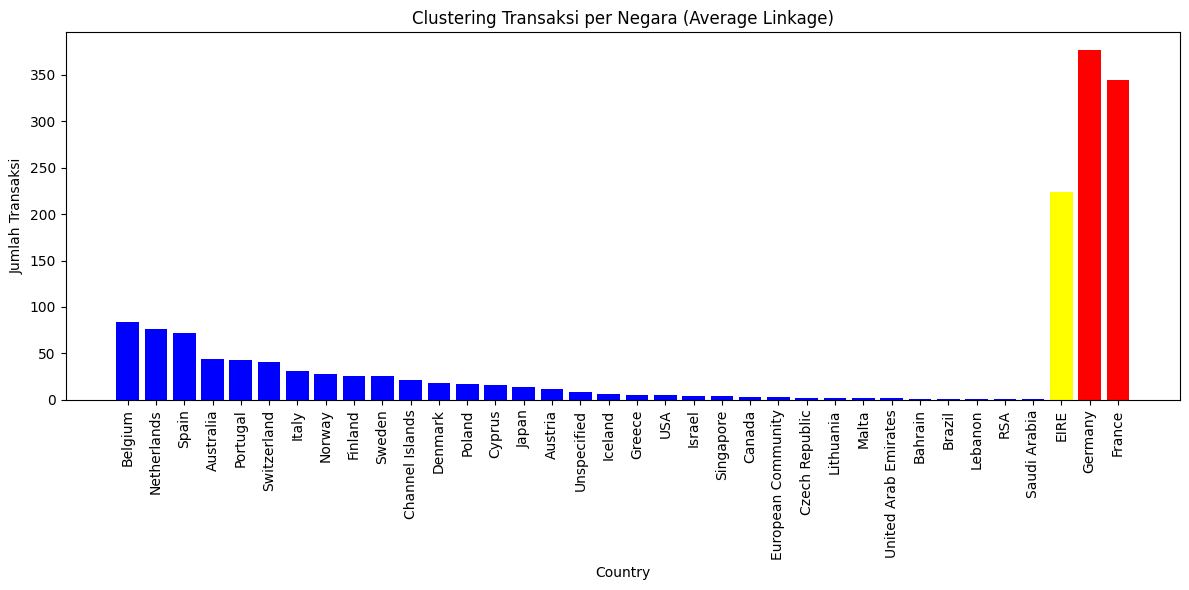

In [25]:
level_order = ['Rendah', 'Sedang', 'Tinggi']
trans_by_country['Level'] = pd.Categorical(trans_by_country['Level'], categories=level_order, ordered=True)
trans_by_country_sorted = trans_by_country.sort_values(['Level', 'TransactionCount'], ascending=[True, False])

color_map = {'Rendah': 'blue', 'Sedang': 'yellow', 'Tinggi': 'red'}
colors = trans_by_country_sorted['Level'].map(color_map)
plt.figure(figsize=(12, 6))
plt.bar(trans_by_country_sorted['Country'], trans_by_country_sorted['TransactionCount'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Jumlah Transaksi')
plt.title('Clustering Transaksi per Negara (Average Linkage)')
plt.tight_layout()
plt.show()
